In [7]:
  
import gym
import numpy as np

from numpy.random import random, choice
import matplotlib.pyplot as plt



env = gym.make("FrozenLake-v0")


# parameters for sarsa(lambda)
episodes = 10000
gamma = 1.0
alpha = 0.1
epsilon = 1.0
epsilon_decay = 0.999 # decay per episode
eligibility_decay = 0.3

no_states = env.observation_space.n
no_actions = env.action_space.n
Q = np.zeros((no_states, no_actions))
returns = []



In [8]:
def epsilon_greedy(state, Q, epsilon):

    values = Q[state,:]
    max_value = max(values)
    no_actions = len(values)

    greedy_actions = [a for a in range(no_actions) if values[a] == max_value]
    
    explore = (random() < epsilon)
  
    if explore:
        return choice([a for a in range(no_actions)])
    else:
        return choice([a for a in greedy_actions])


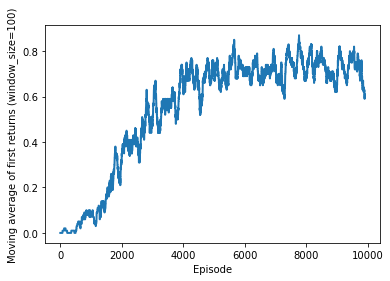

In [9]:
for episode in range(episodes):

    state = env.reset()
    epsilon *= epsilon_decay # epsilon decays for each state

    action = epsilon_greedy(state, Q, epsilon)

    R = [] # No first return
    E = np.zeros((no_states, no_actions))

    while True:

        E = eligibility_decay * gamma * E
        E[state, action] += 1

        new_state, reward, done, info = env.step(action)
        new_action = epsilon_greedy(new_state, Q, epsilon)

        R.append(reward)

        delta = reward + gamma * Q[new_state, new_action] - Q[state, action]
        Q = Q + alpha * delta * E 

        state, action = new_state, new_action

        if done:
            break

    T = len(R)
    G = 0

    # t = T-2, T-3, ..., 0
    t = T - 2

    while t >= 0:
        G = R[t+1] + gamma * G
        t = t - 1

    returns.append(G)


window_size = 100
averaged_returns = np.zeros(len(returns)-window_size+1)

for i in range(len(averaged_returns)):
    averaged_returns[i] = np.mean(returns[i:i+window_size])

plt.plot(averaged_returns, linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Moving average of first returns (window_size={})".format(window_size))
plt.show()